In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *


import scipy


In [2]:
FEATURE_DIMS = ["Color", "Shape", "Pattern"]
PRE_INTERVAL = 1000
POST_INTERVAL = 1000
INTERVAL_SIZE = 100
SMOOTH = 1
EVENT = "StimOnset"
OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"
# path to a dataframe of sessions to analyze

### Entropy around stim onset

Text(0, 0.5, 'Decoder Accuracy')

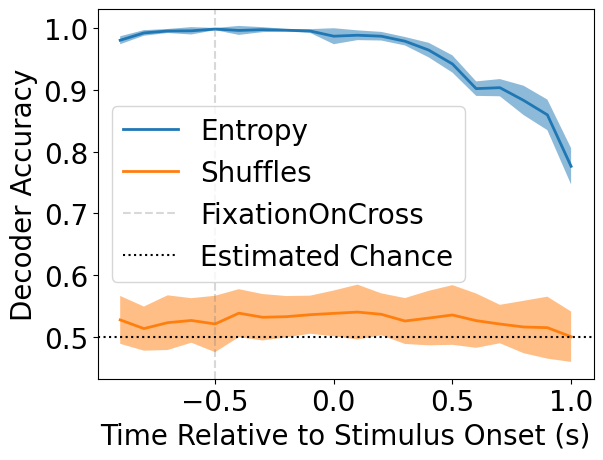

In [13]:
fig, ax = plt.subplots()
entropy_accs = np.load(os.path.join(OUTPUT_DIR, f"entropy_StimOnset_test_accs.npy"))
visualization_utils.visualize_accuracy_across_time_bins(
    entropy_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Entropy",
    right_align=True, 
)
shuffles = []
for i in range(5):
    shuffled_accs = np.load(os.path.join(OUTPUT_DIR, f"entropy_StimOnset_shuffle_{i}_test_accs.npy"))
    shuffles.append(shuffled_accs)
shuffles = np.hstack(shuffles)
visualization_utils.visualize_accuracy_across_time_bins(
    shuffles,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Shuffles",
    right_align=True, 
)

# # add grey band for selection period
# ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add dotted line for feedback start
ax.axvline(-0.5, alpha=0.3, color='gray', linestyle='dashed', label="FixationOnCross")
# # add estimated chance
ax.axhline(1/2, color='black', linestyle='dotted', label="Estimated Chance")
ax.legend()
ax.set_xlabel("Time Relative to Stimulus Onset (s)")
ax.set_ylabel("Decoder Accuracy")

### Just plot the fixation on cross period

Text(0, 0.5, 'Decoder Accuracy')

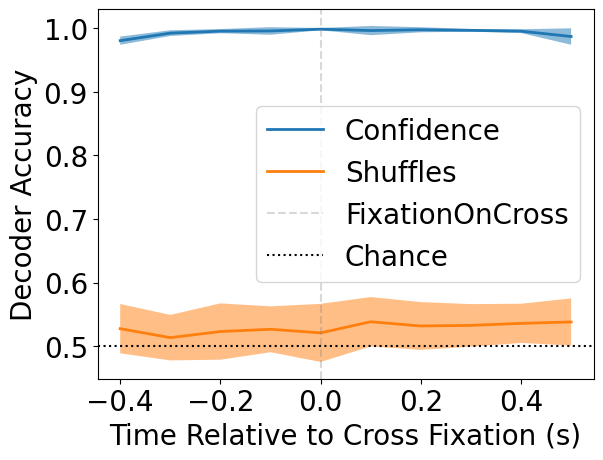

In [14]:
PRE_INTERVAL = 500
POST_INTERVAL = 500
INTERVAL_SIZE = 100
SMOOTH = 1
EVENT = "FixationOnCross"

fig, ax = plt.subplots()
entropy_accs = np.load(os.path.join(OUTPUT_DIR, f"entropy_StimOnset_test_accs.npy"))
visualization_utils.visualize_accuracy_across_time_bins(
    entropy_accs[:10, :],
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Confidence",
    right_align=True, 
)
shuffles = []
for i in range(5):
    shuffled_accs = np.load(os.path.join(OUTPUT_DIR, f"entropy_StimOnset_shuffle_{i}_test_accs.npy"))
    shuffles.append(shuffled_accs)
shuffles = np.hstack(shuffles)
visualization_utils.visualize_accuracy_across_time_bins(
    shuffles[:10, :],
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Shuffles",
    right_align=True, 
)

# # add grey band for selection period
# ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add dotted line for feedback start
ax.axvline(0, alpha=0.3, color='gray', linestyle='dashed', label="FixationOnCross")
# # add estimated chance
ax.axhline(1/2, color='black', linestyle='dotted', label="Chance")
ax.legend()
ax.set_xlabel("Time Relative to Cross Fixation (s)")
ax.set_ylabel("Decoder Accuracy")

In [15]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"
# path to a dataframe of sessions to analyze

Text(0, 0.5, 'Decoder Accuracy')

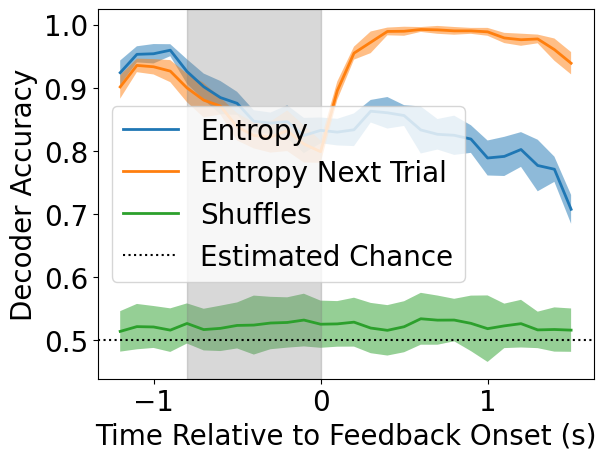

In [16]:
fig, ax = plt.subplots()
entropy_accs = np.load(os.path.join(OUTPUT_DIR, f"entropy_{EVENT}_test_accs.npy"))
entropy_next_trial_accs = np.load(os.path.join(OUTPUT_DIR, f"entropy_{EVENT}_next_trial_entropy_test_accs.npy"))

visualization_utils.visualize_accuracy_across_time_bins(
    entropy_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Entropy",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    entropy_next_trial_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Entropy Next Trial",
    right_align=True, 
)
shuffles = []
for i in range(5):
    shuffled_accs = np.load(os.path.join(OUTPUT_DIR, f"entropy_{EVENT}_shuffle_{i}_test_accs.npy"))
    shuffles.append(shuffled_accs)
shuffles = np.hstack(shuffles)
visualization_utils.visualize_accuracy_across_time_bins(
    shuffles,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Shuffles",
    right_align=True, 
)

# # add grey band for selection period
# ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add dotted line for feedback start
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add estimated chance
ax.axhline(1/2, color='black', linestyle='dotted', label="Estimated Chance")
ax.legend()
ax.set_xlabel("Time Relative to Feedback Onset (s)")
ax.set_ylabel("Decoder Accuracy")

### Look at cross decoding of confidence

Text(0, 0.5, 'Time Model Trained (s)')

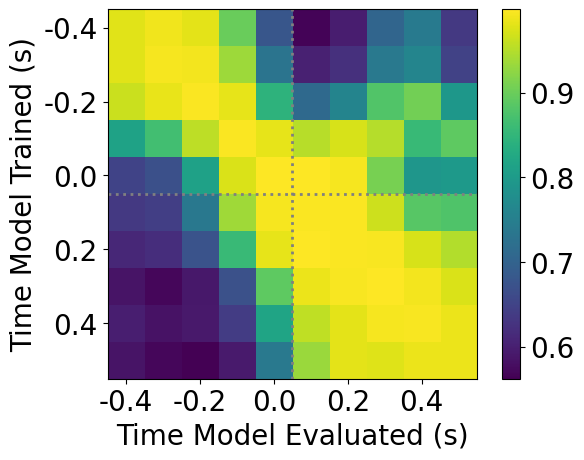

In [17]:
fig, ax = plt.subplots()
cross_accs = np.load(os.path.join(OUTPUT_DIR, f"entropy_StimOnset_cross_accs.npy"))
cross_accs = np.mean(cross_accs, axis=2)[:10, :10]
colors = ax.matshow(cross_accs)
fig.colorbar(colors, ax=ax)
ratio = 1000 / 100
# tick_labels = np.array([-1, -0.5, 0, 0.5, 1.0, 1.5])
tick_labels = np.array([-0.4, -0.2, 0, 0.2, 0.4])
tick_pos = (tick_labels + 0.4) * ratio
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.set_yticks(tick_pos)
ax.set_yticklabels(tick_labels)
ax.axvline(4.5, color="gray", linestyle="dotted", linewidth=2)
ax.axhline(4.5, color="gray", linestyle="dotted", linewidth=2)
ax.set_xlabel("Time Model Evaluated (s)")
ax.set_ylabel("Time Model Trained (s)")

### Look at weights of entropy decoder

In [3]:
models = np.load(os.path.join(OUTPUT_DIR, f"entropy_StimOnset_models.npy"), allow_pickle=True)
# evaluate weights by time. Pass in number of neurons and number of classes
weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=756, num_classes=2)
valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)

means = np.mean(weights, axis=1)
means_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})

In [4]:
len(positions.manual_structure.unique())

10

Text(0.5, 0, 'Time Relative to Cross Fixation (s)')

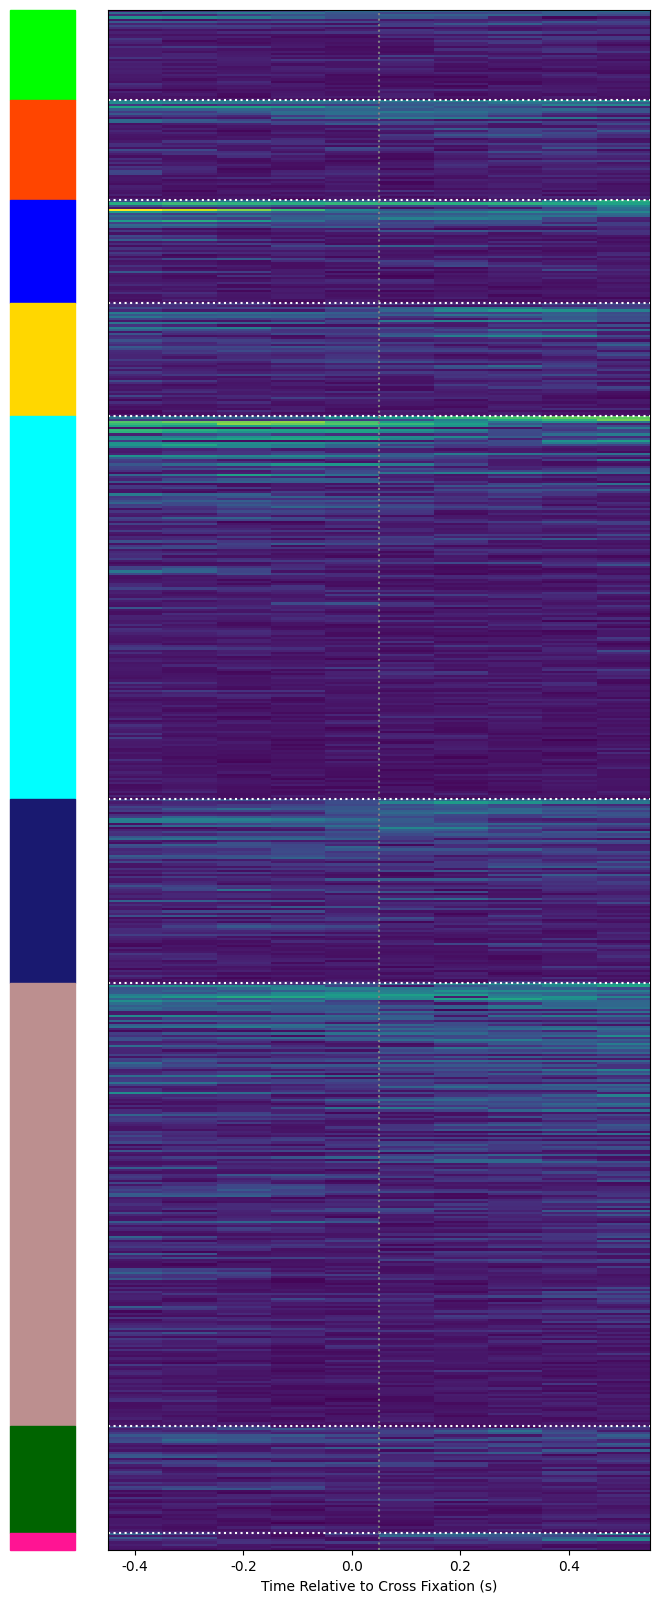

In [5]:
# matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(7, 20))
visualization_utils.visualize_weights(
    positions, 
    weights[:, :10], 
    "manual_structure", 
    name_to_color=visualization_utils.REGION_TO_COLOR, 
    add_region=True, 
    mean_weights_df=means_df,
    ax=ax
)
ratio = 10
tick_labels = np.array([-0.4, -0.2, 0, 0.2, 0.4])
tick_pos = (tick_labels + 0.4) * ratio
# fig.colorbar(colors)
# axis = np.arange(0, 28, 3)s
# labels = np.around((axis - 13) * 0.1, 1)
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.axvline(4.5, color="gray", linestyle="dotted", linewidth=1.5)
ax.set_xlabel("Time Relative to Cross Fixation (s)")

### Look at weights, cross decoding during around Stimulus Onset

Text(0, 0.5, 'Time Model Trained (s)')

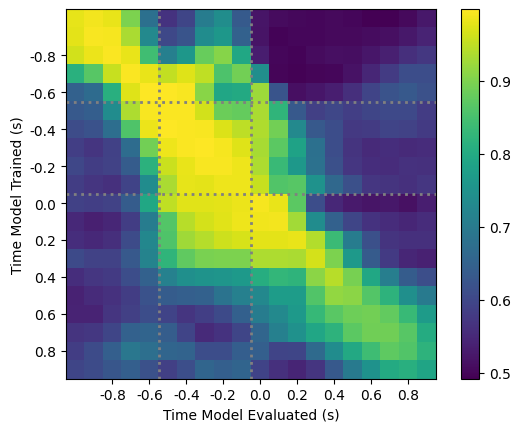

In [6]:
fig, ax = plt.subplots()
cross_accs = np.load(os.path.join(OUTPUT_DIR, f"entropy_StimOnset_cross_accs.npy"))
cross_accs = np.mean(cross_accs, axis=2)
colors = ax.matshow(cross_accs)
fig.colorbar(colors, ax=ax)
ratio = 1000 / 100
# tick_labels = np.array([-1, -0.5, 0, 0.5, 1.0, 1.5])
tick_labels = np.array([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
tick_pos = (tick_labels + 1) * ratio
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.set_yticks(tick_pos)
ax.set_yticklabels(tick_labels)
ax.axvline(4.5, color="gray", linestyle="dotted", linewidth=2)
ax.axhline(4.5, color="gray", linestyle="dotted", linewidth=2)
ax.axvline(9.5, color="gray", linestyle="dotted", linewidth=2)
ax.axhline(9.5, color="gray", linestyle="dotted", linewidth=2)
ax.set_xlabel("Time Model Evaluated (s)")
ax.set_ylabel("Time Model Trained (s)")

Text(0.5, 0, 'Time Relative to Cross Fixation (s)')

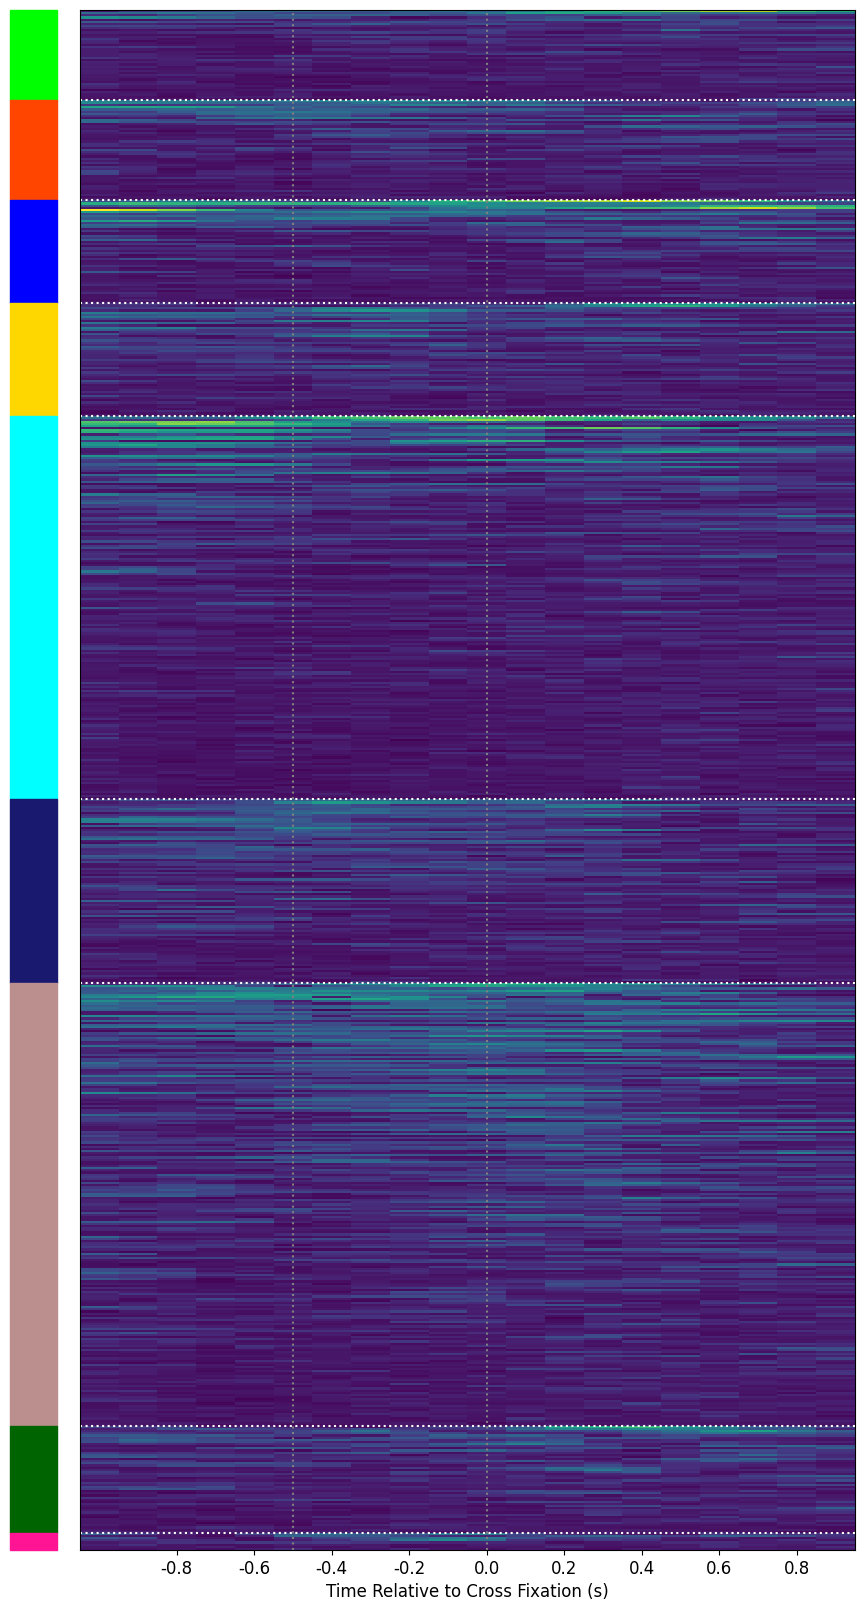

In [21]:
models = np.load(os.path.join(OUTPUT_DIR, f"entropy_StimOnset_models.npy"), allow_pickle=True)
# evaluate weights by time. Pass in number of neurons and number of classes
weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=756, num_classes=2)
valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)

means = np.mean(weights, axis=1)
means_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})

matplotlib.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 20))
visualization_utils.visualize_weights(
    positions, 
    weights[:, :], 
    "manual_structure", 
    name_to_color=visualization_utils.REGION_TO_COLOR, 
    add_region=True, 
    mean_weights_df=means_df,
    ax=ax
)
ratio = 10
tick_labels = np.array([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
tick_pos = (tick_labels + 1) * ratio
# fig.colorbar(colors)
# axis = np.arange(0, 28, 3)s
# labels = np.around((axis - 13) * 0.1, 1)
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.axvline(5, color="gray", linestyle="dotted", linewidth=1.5)
ax.axvline(10, color="gray", linestyle="dotted", linewidth=1.5)

ax.set_xlabel("Time Relative to Cross Fixation (s)")

### Look at weights for next trial entropy relative to Feedback Onset

Text(0.5, 0, 'Time Relative to Feedback Onset (s)')

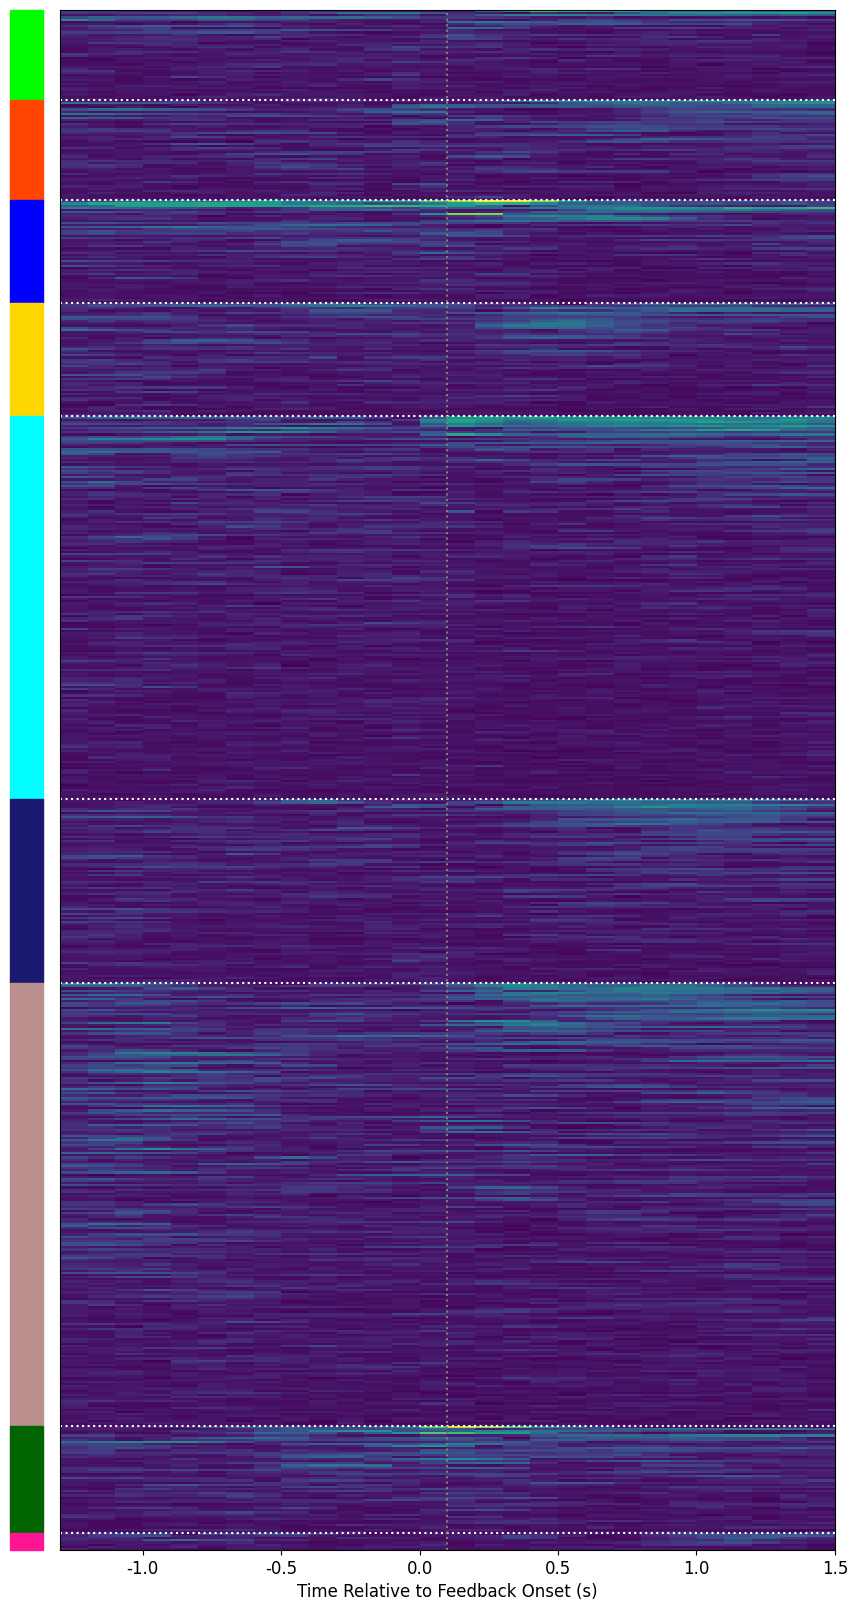

In [26]:
models = np.load(os.path.join(OUTPUT_DIR, f"entropy_FeedbackOnset_next_trial_entropy_models.npy"), allow_pickle=True)
# evaluate weights by time. Pass in number of neurons and number of classes
weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=756, num_classes=2)
valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)

means = np.mean(weights, axis=1)
means_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})

matplotlib.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 20))
visualization_utils.visualize_weights(
    positions, 
    weights[:, :], 
    "manual_structure", 
    name_to_color=visualization_utils.REGION_TO_COLOR, 
    add_region=True, 
    mean_weights_df=means_df,
    ax=ax
)
ratio = 1000 / 100
tick_labels = np.array([-1, -0.5, 0, 0.5, 1.0, 1.5])
tick_pos = (tick_labels + 1.3) * ratio - 0.5
# fig.colorbar(colors)
# axis = np.arange(0, 28, 3)s
# labels = np.around((axis - 13) * 0.1, 1)
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.axvline(13.48, color="gray", linestyle="dotted", linewidth=1.5)


ax.set_xlabel("Time Relative to Feedback Onset (s)")

### Plot weights of two time periods together

In [7]:
models = np.load(os.path.join(OUTPUT_DIR, f"entropy_StimOnset_models.npy"), allow_pickle=True)
stim_onset_weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=756, num_classes=2)

models = np.load(os.path.join(OUTPUT_DIR, f"entropy_FeedbackOnset_next_trial_entropy_models.npy"), allow_pickle=True)
# evaluate weights by time. Pass in number of neurons and number of classes
fb_onset_weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=756, num_classes=2)

means = np.mean(np.hstack((stim_onset_weights, fb_onset_weights)), axis=1)
means_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})

valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)

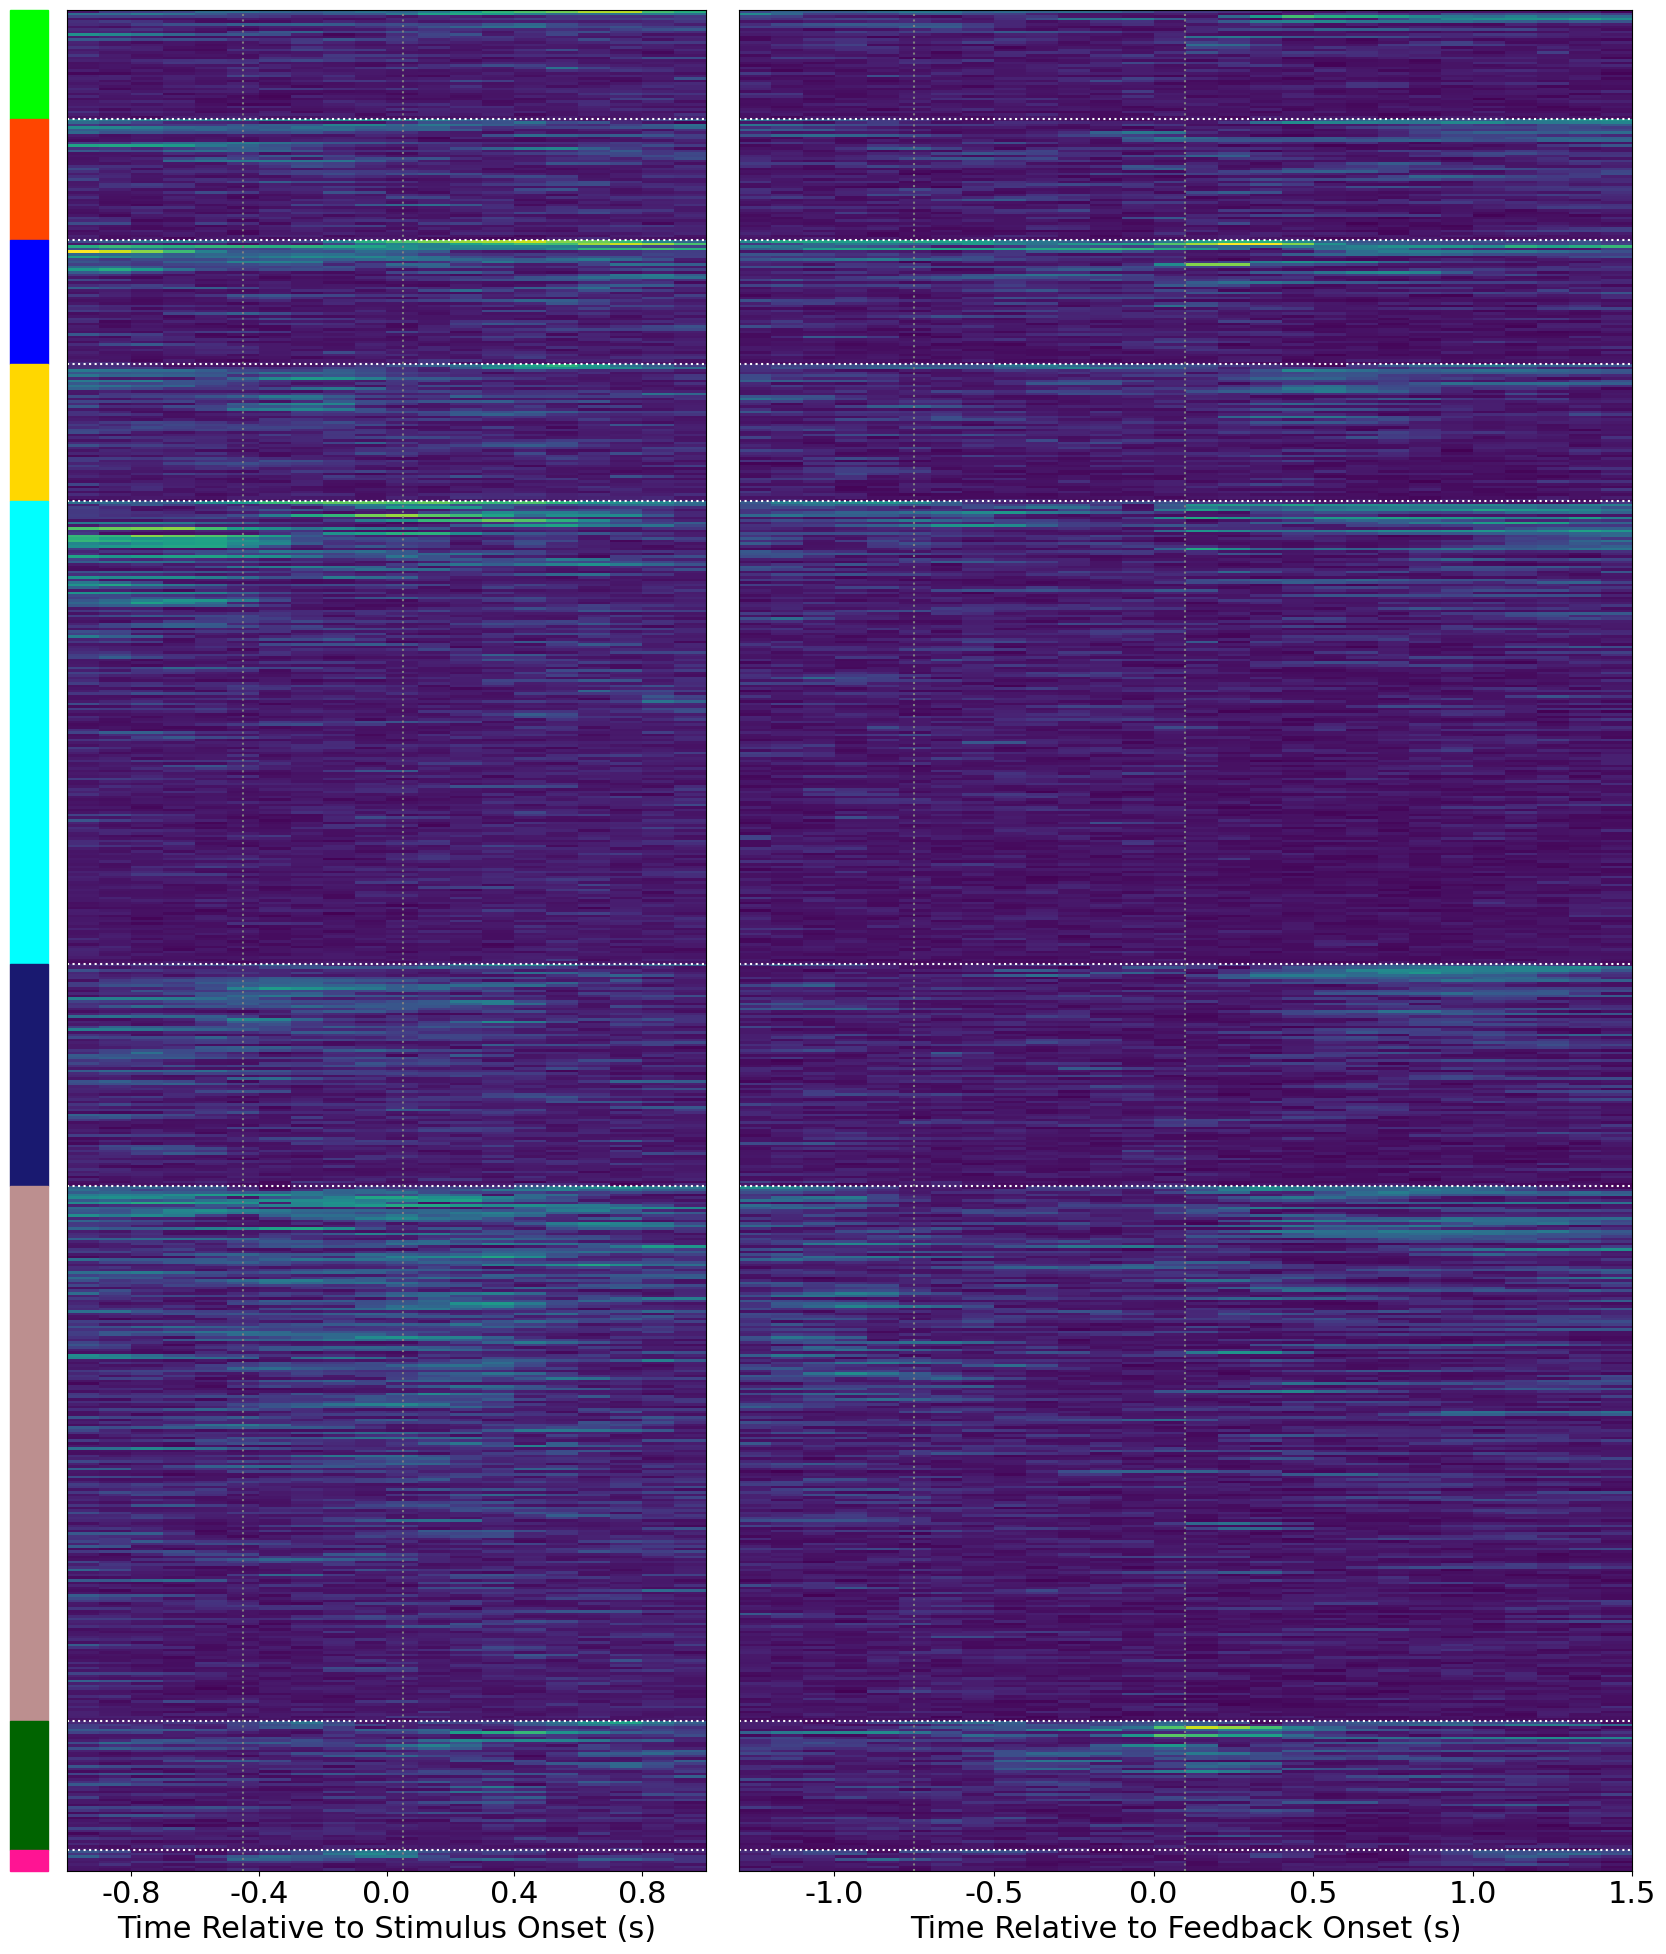

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(17, 20), gridspec_kw={'width_ratios': [5, 7]})
ax = axs[0]
matplotlib.rcParams.update({'font.size': 22})

visualization_utils.visualize_weights(
    positions, 
    stim_onset_weights, 
    "manual_structure", 
    name_to_color=visualization_utils.REGION_TO_COLOR, 
    add_region=True, 
    mean_weights_df=means_df,
    ax=ax
)
ratio = 10
tick_labels = np.array([-0.8, -0.4, 0, 0.4, 0.8])
tick_pos = (tick_labels + 1) * ratio - 0.5
# fig.colorbar(colors)
# axis = np.arange(0, 28, 3)s
# labels = np.around((axis - 13) * 0.1, 1)
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.axvline(5, color="gray", linestyle="dotted", linewidth=1.5)
ax.axvline(10, color="gray", linestyle="dotted", linewidth=1.5)
ax.set_xlabel("Time Relative to Stimulus Onset (s)")

ax = axs[1]
visualization_utils.visualize_weights(
    positions, 
    fb_onset_weights, 
    "manual_structure", 
    name_to_color=visualization_utils.REGION_TO_COLOR, 
    add_region=False, 
    mean_weights_df=means_df,
    ax=ax
)
tick_labels = np.array([-1, -0.5, 0, 0.5, 1.0, 1.5])
tick_pos = (tick_labels + 1.3) * ratio - 0.5
# fig.colorbar(colors)
# axis = np.arange(0, 28, 3)s
# labels = np.around((axis - 13) * 0.1, 1)
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.axvline(13.48, color="gray", linestyle="dotted", linewidth=1.5)
ax.axvline(5, color="gray", linestyle="dotted", linewidth=1.5)


ax.set_xlabel("Time Relative to Feedback Onset (s)")
fig.tight_layout()